In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
import tensorflow as tf

from cnn_normalize import prepare_data, add_indicators, add_lags, split_data, normalize_data, prepare_sequences, split_train_and_test_data, get_cnn_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(6058, 10)
Open           float64
High           float64
Low            float64
Close          float64
Change         float64
Volume           int64
Direction        int64
Target           int32
Low_Shadow     float64
High_Shadow    float64
dtype: object


,Open,High,Low,Close,Change,Volume,Direction,Target,Low_Shadow,High_Shadow
Date,,,,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000,0,1,16.859985,8.750000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000,0,1,1.989990,0.000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000,1,0,24.429932,13.849976
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000,1,1,11.349976,9.790039
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000,1,0,40.739990,38.020020
...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1,0,24.820312,11.489746
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1,0,9.500000,17.779785
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1,0,40.530273,36.359863


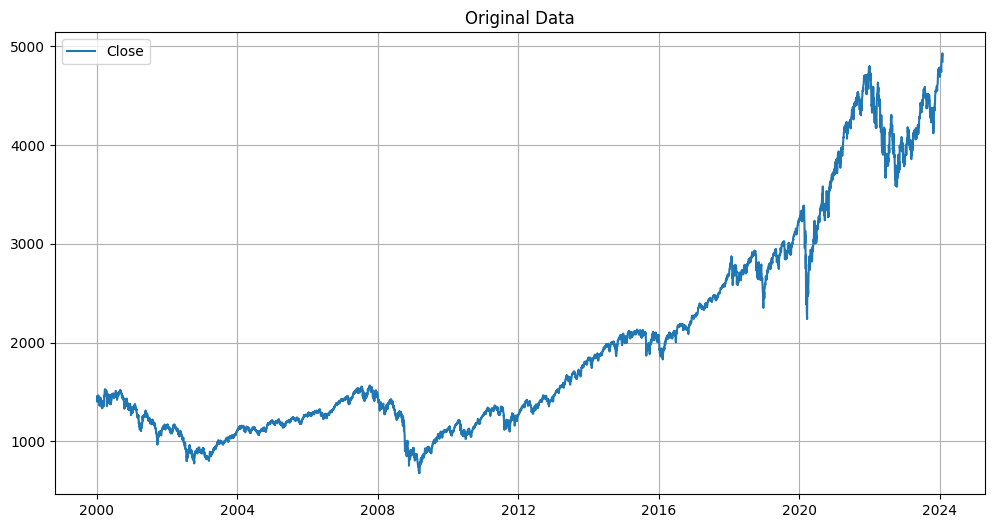

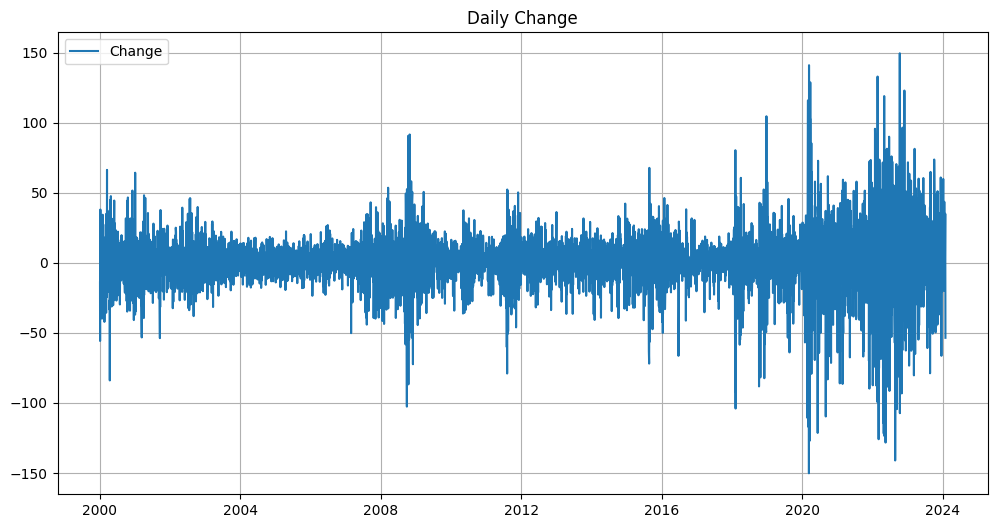

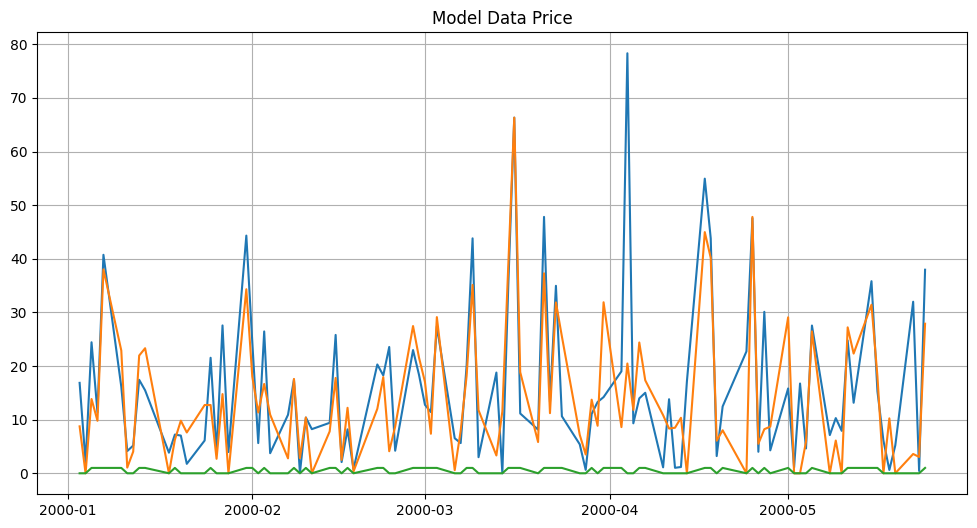

In [3]:
data = prepare_data(SP500_TICKER)


# Show data
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])


test = data['Close'] - data['Low']
tets2 = data['High'] - data['Open']

plt = config_chart('Model Data Price')
plt.plot(test [0:100])
plt.plot(tets2[0:100])
plt.plot(data.Direction[0:100])

data

---

## For **add_indicators** function

(6039, 14)


,Open,High,Low,Close,Change,Volume,Direction,Target,Low_Shadow,High_Shadow,MA5,MA10,MA20,RSI
Date,,,,,,,,,,,,,,
2000-01-31,1360.160034,1394.479980,1350.140015,1394.459961,34.299927,993800000,1,0,44.319946,34.319946,0.999951,-22.220044,-31.125543,40.441968
2000-02-01,1394.459961,1412.489990,1384.790039,1409.280029,14.820068,981000000,1,1,24.489990,18.030029,15.970020,-2.813977,-14.008478,45.131273
2000-02-02,1409.280029,1420.609985,1403.489990,1409.119995,-0.160034,1038600000,0,0,5.630005,11.329956,14.803979,1.703992,-14.653510,45.089987
2000-02-03,1409.119995,1425.780029,1398.520020,1424.969971,15.849976,1146500000,1,0,26.449951,16.660034,25.371973,19.613965,0.053467,49.971310
2000-02-04,1424.969971,1435.910034,1420.630005,1424.369995,-0.599976,1045100000,0,0,3.739990,10.940063,11.930005,20.712988,-1.592511,49.790874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1,0,24.820312,11.489746,30.650098,77.385107,112.182080,72.932465
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1,0,9.500000,17.779785,17.228125,63.122168,103.522632,72.142640
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1,0,40.530273,36.359863,38.688086,85.672119,133.253589,75.458828


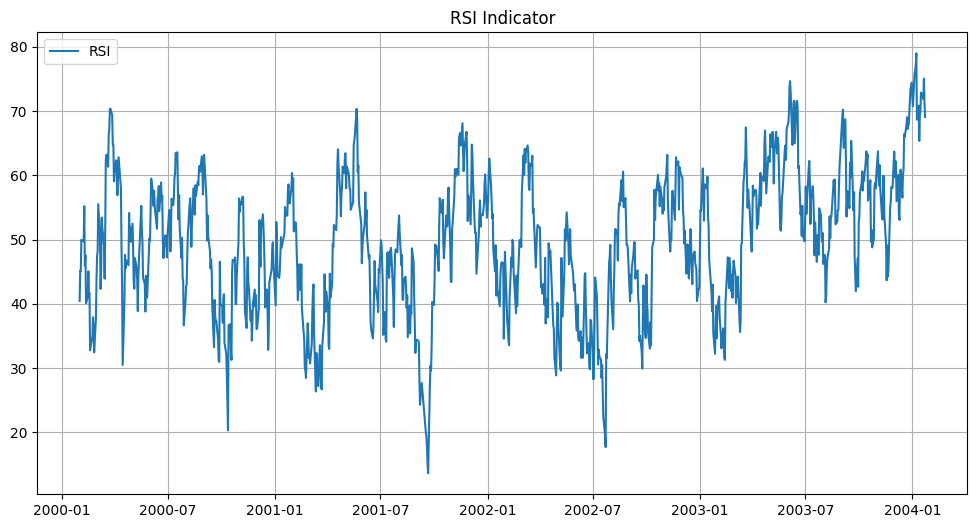

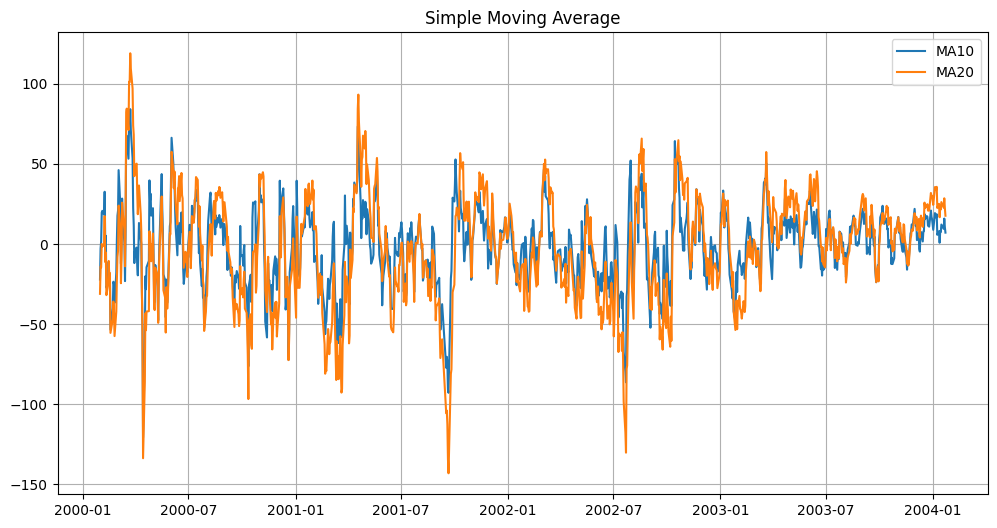

In [4]:
data = add_indicators(data)


# Show data
plt = config_chart('RSI Indicator')
plt.plot(data['RSI'][0:1000])
plt.legend(['RSI'])

plt = config_chart('Simple Moving Average')
plt.plot(data['MA10'][0:1000])
plt.plot(data['MA20'][0:1000])
plt.legend(['MA10', 'MA20'])

# plt = config_chart('Stochastic')
# plt.plot(data['Stochastic_K'][0:1000])
# plt.plot(data['Stochastic_D'][0:1000])
# plt.legend([''])

print(data.shape)

data

---

## For add_lags function

In [5]:
# data = add_lags(data)


# Show data
# data

---
## For split_data function

In [6]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

In [7]:
data = normalize_data(data)


# Show data
# plt = config_chart('Normalized Data')
# plt.plot(data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

data

,Open,High,Low,Close,Change,Volume,Direction,Target,Low_Shadow,High_Shadow,MA5,MA10,MA20,RSI
Date,,,,,,,,,,,,,,
2000-01-31,0.160335,0.165071,0.160808,0.168869,0.615560,0.057452,1.0,0.0,0.202698,0.207950,0.575738,0.651097,0.646201,0.366921
2000-02-01,0.168412,0.169323,0.168962,0.172355,0.550575,0.056299,1.0,1.0,0.112005,0.109247,0.605980,0.682713,0.665119,0.431117
2000-02-02,0.171902,0.171240,0.173362,0.172317,0.500601,0.061488,0.0,0.0,0.025749,0.068650,0.603624,0.690074,0.664406,0.430552
2000-02-03,0.171864,0.172460,0.172193,0.176046,0.554010,0.071209,1.0,0.0,0.120969,0.100946,0.624973,0.719252,0.680660,0.497376
2000-02-04,0.175597,0.174852,0.177396,0.175904,0.499133,0.062074,0.0,0.0,0.017105,0.066287,0.597818,0.721043,0.678841,0.494906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.990762,0.992223,0.988956,0.992057,0.526155,0.330118,1.0,0.0,0.113516,0.069618,0.635636,0.813372,0.804585,0.811709
2024-01-26,0.991292,0.994240,0.991811,0.991306,0.508007,0.270026,1.0,0.0,0.043448,0.107730,0.608521,0.790135,0.795015,0.800896
2024-01-29,0.992243,0.999580,0.993206,1.000000,0.617828,0.285499,1.0,0.0,0.185366,0.220310,0.651874,0.826873,0.827874,0.846294


----

## For **prepare_sequences** function

(6038, 9)
(6038,)
[0.16886906 0.61555957 0.57573777 0.65109699 0.64620095 1.
 0.         0.20269822 0.20794952]
2000-01-31T00:00:00.000000000
(6038,)
(6038,)
[1. 0. 1. ... 1. 0. 0.]
2000-02-01T00:00:00.000000000


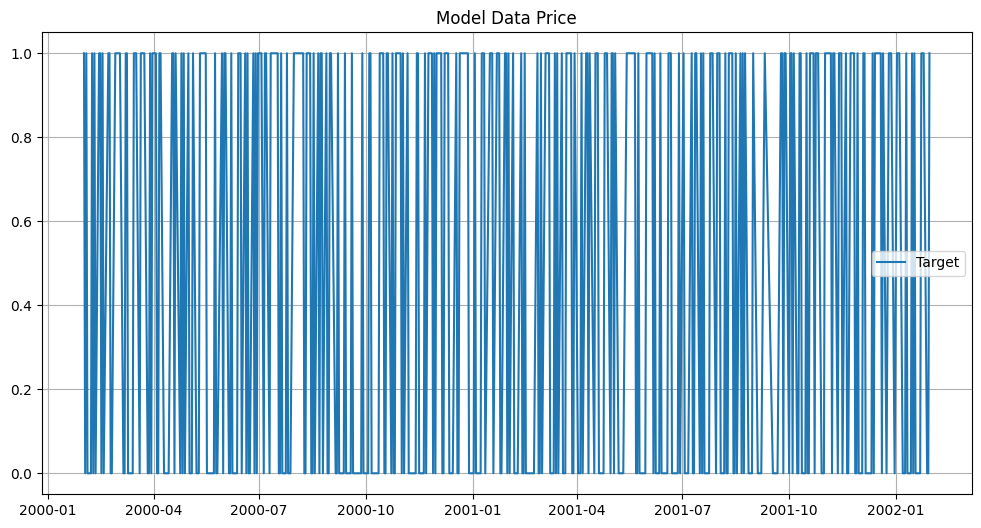

In [8]:
indicators, indicators_dates, target, target_dates = prepare_sequences(data)

# # Show data
print(indicators.shape)
print(indicators_dates.shape)
print(indicators[0])
print(indicators_dates[0])

print(target.shape)
print(target_dates.shape)
print(target)
print(target_dates[0])

plt = config_chart('Model Data Price')
plt.plot(target_dates[0:500], target[0:500])
plt.legend(['Target'])


---

## For **split_train_and_test_data** function

(4830, 9)
(4830,)
(604, 9)
(604,)
(604, 9)
(604,)


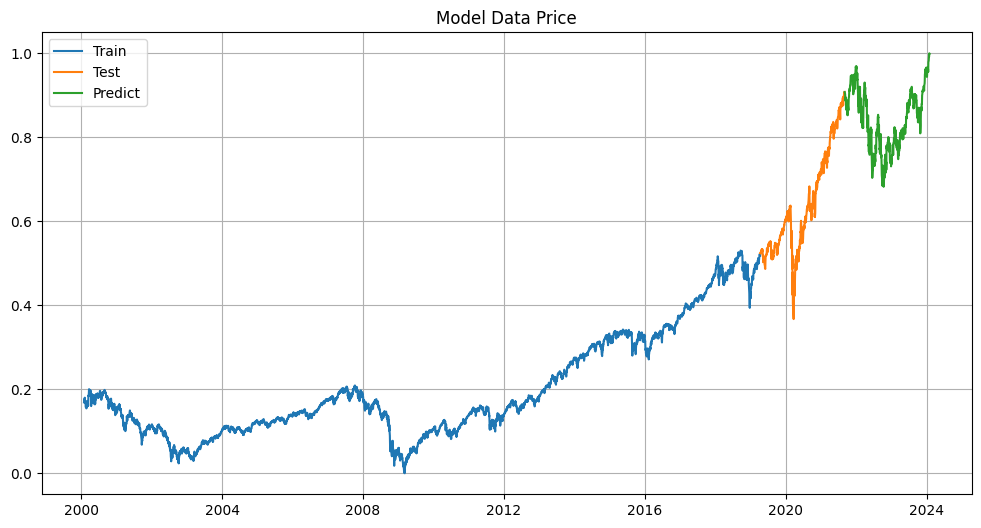

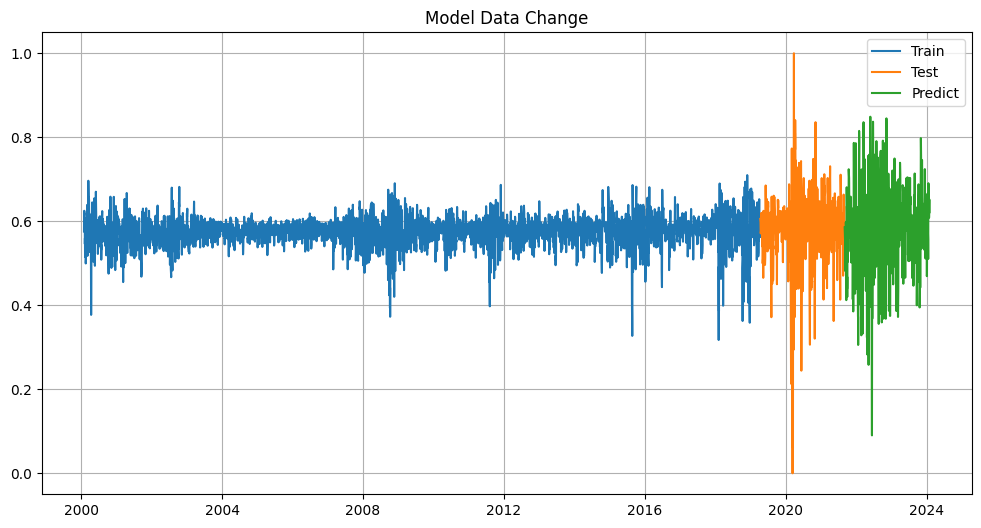

In [9]:
train, test, predict = split_train_and_test_data(indicators, target, indicators_dates, target_dates)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data Price')
plt.plot(train['x_dates'], train['x'][:, 0])
plt.plot(test['x_dates'], test['x'][:, 0])
plt.plot(predict['x_dates'], predict['x'][:, 0])
plt.legend(['Train', 'Test', 'Predict'])

plt = config_chart('Model Data Change')
plt.plot(train['x_dates'], train['x'][:, 2])
plt.plot(test['x_dates'], test['x'][:, 2])
plt.plot(predict['x_dates'], predict['x'][:, 2])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **get_lstm_data** function

In [10]:
train, test, predict = get_cnn_data(SP500_TICKER)

In [11]:
print(train["x"].shape) 
print(train["x"])

print(train["y"].shape)
print(train["y"])


(4830, 9)
[[0.16886906 0.61555957 0.57573777 ... 0.         0.20269822 0.20794952]
 [0.17235498 0.55057472 0.60597971 ... 1.         0.11200549 0.10924656]
 [0.17231734 0.50060107 0.60362413 ... 0.         0.02574895 0.06864984]
 ...
 [0.51786937 0.47317882 0.5622028  ... 1.         0.02227247 0.00181656]
 [0.52022389 0.52395267 0.57644088 ... 0.         0.04152793 0.05053232]
 [0.52024979 0.48912582 0.57305524 ... 1.         0.02895075 0.00908872]]
(4830,)
[1. 0. 1. ... 1. 0. 1.]


In [12]:
print(test["x"].shape) 
print(test["x"])

print(test["y"].shape)
print(test["y"])

(604, 9)
[[0.52474004 0.5229851  0.60569267 ... 1.         0.0413437  0.05865211]
 [0.52430963 0.49199433 0.59803253 ... 1.         0.04161949 0.00775588]
 [0.52465775 0.48378789 0.58936192 ... 0.         0.02904231 0.02302505]
 ...
 [0.90467846 0.47754999 0.60861421 ... 1.         0.03146752 0.00993783]
 [0.90501004 0.4854225  0.60018951 ... 0.         0.00946639 0.05035185]
 [0.90803501 0.50937558 0.59911945 ... 0.         0.05620876 0.06889319]]
(604,)
[0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1

In [13]:
print(predict["x"].shape) 
print(predict["x"])

print(predict["y"].shape)
print(predict["y"])

(604, 9)
[[0.90767747 0.51117715 0.58551967 ... 0.         0.06462555 0.05471573]
 [0.90405505 0.44992698 0.55794783 ... 0.         0.03215087 0.        ]
 [0.90265316 0.48772415 0.54938661 ... 1.         0.09201755 0.02242002]
 ...
 [0.9913064  0.5080073  0.60852129 ... 0.         0.04344845 0.10773029]
 [1.         0.61782823 0.65187386 ... 0.         0.18536607 0.22030967]
 [0.99930377 0.49806608 0.62150279 ... 0.         0.03979053 0.03150578]]
(604,)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1

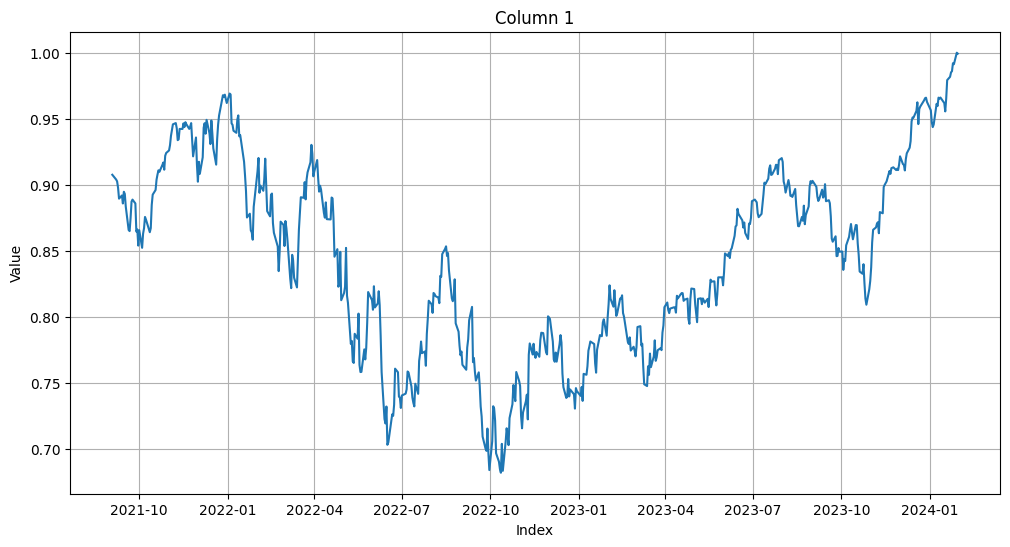

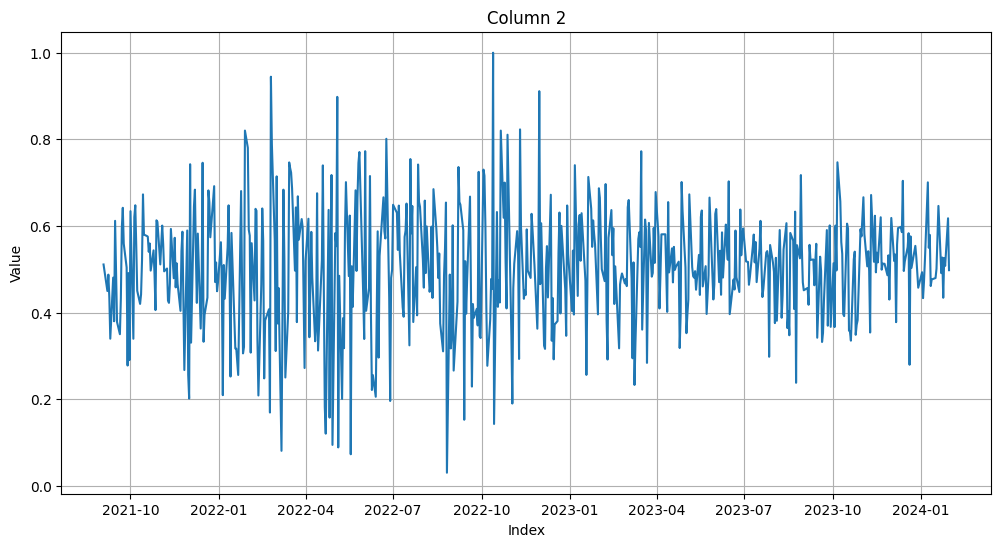

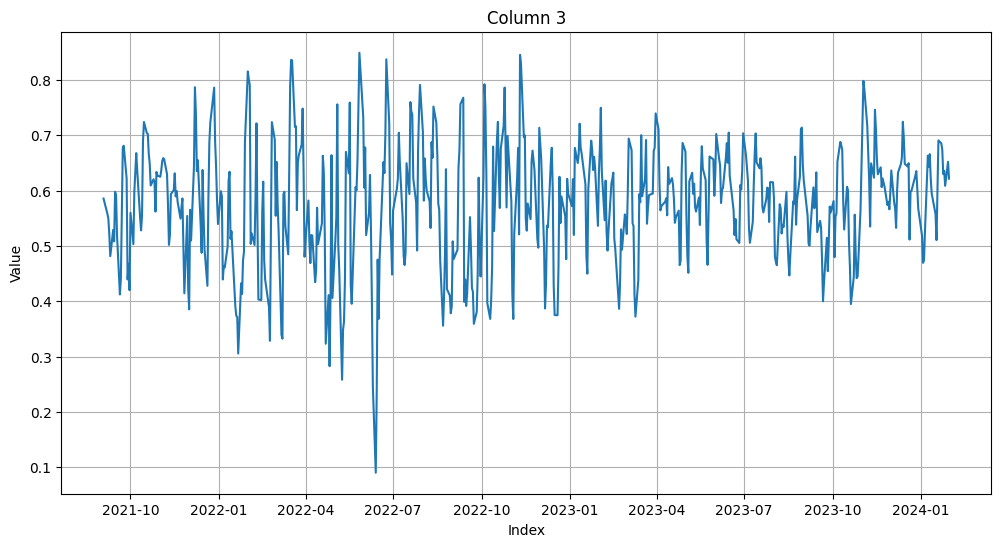

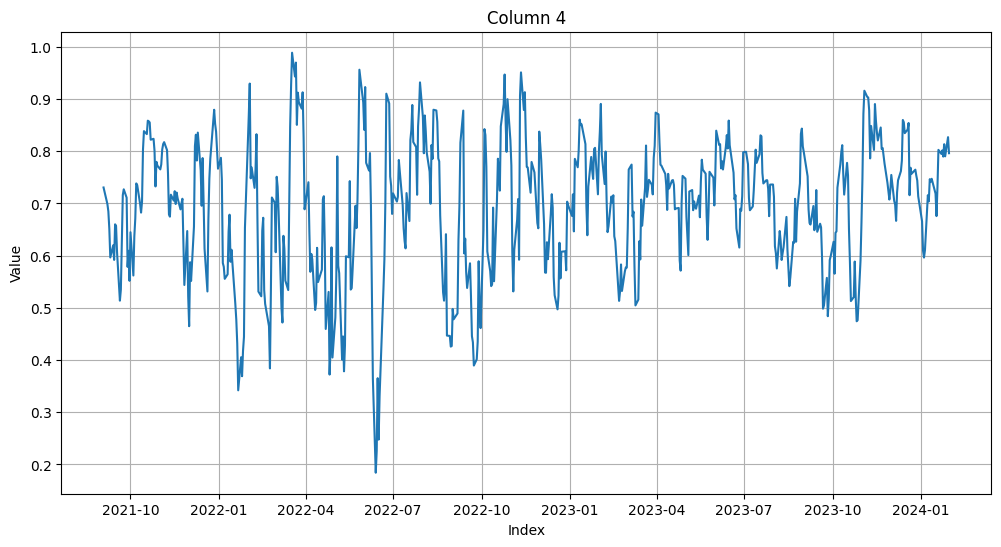

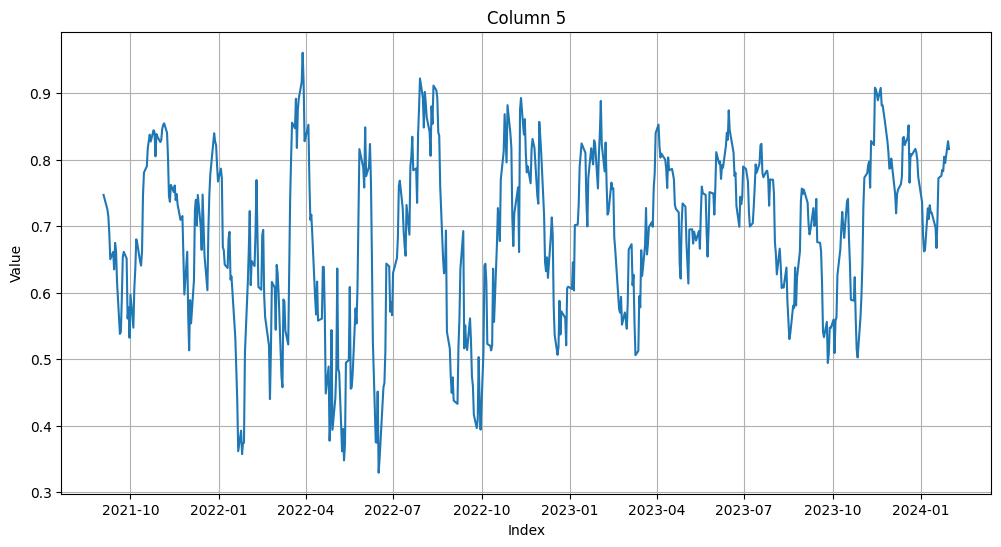

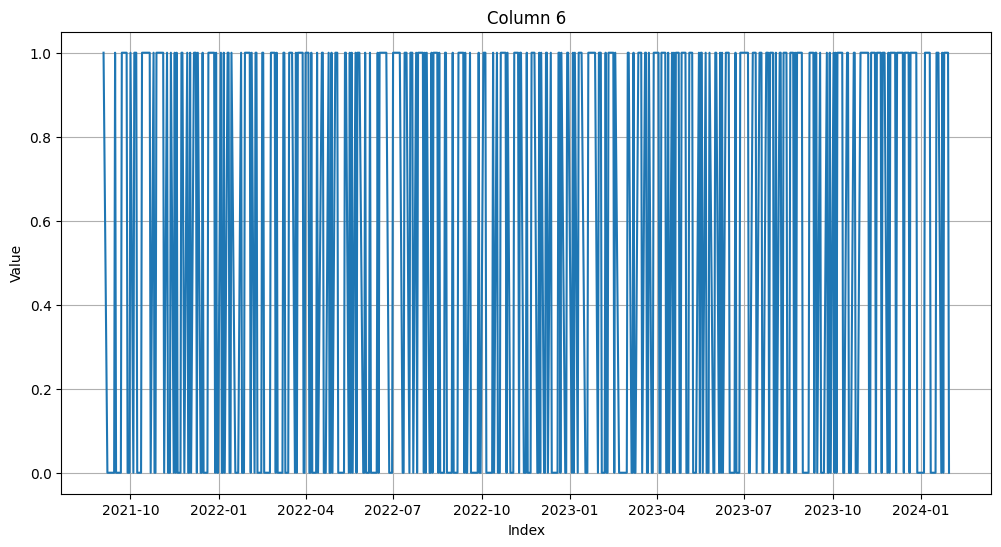

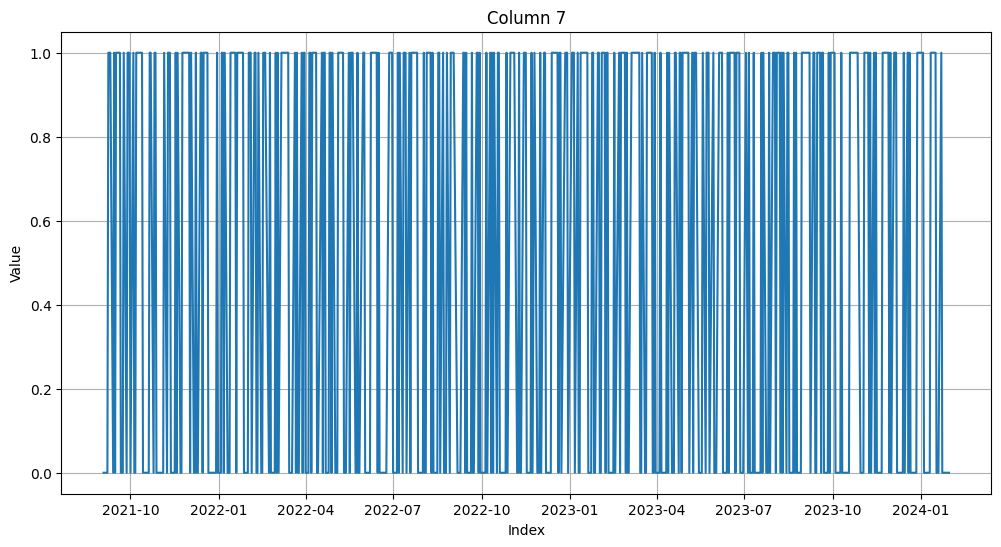

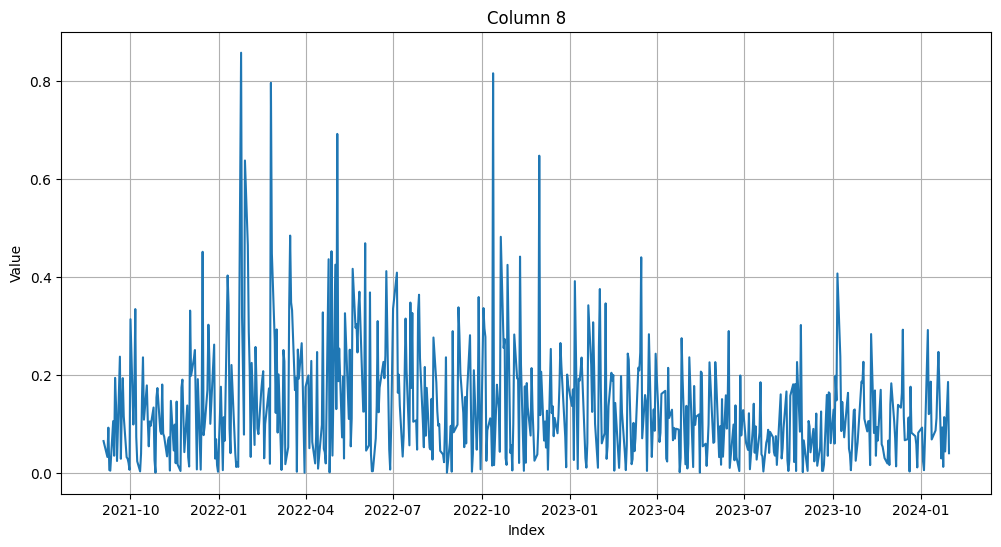

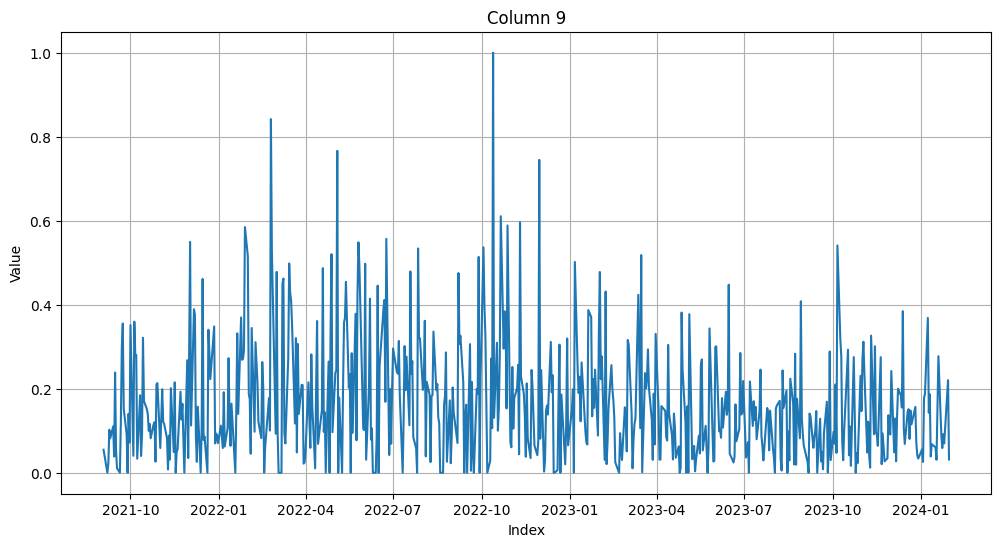

In [14]:
num_columns = predict["x"].shape[1]  # Get the number of columns
for i in range(num_columns):
    plt = config_chart('Model Data')
    plt.plot(predict['x_dates'], predict["x"][:, i])
    plt.title(f'Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()